Isaac Wu 6/2/2024
Diffraction Exercise
Aim: Write a program to calculate the near and far‑field diffraction patterns of an arbitrary one‑dimensional
complex aperture using the Fast Fourier Transform technique. Test this program by using simple test
apertures (a slit) for which the theoretical pattern is known. Investigate more complicated apertures
for which analytical results are difficult to compute.

Start by importing necessary modules.

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time

Define constants and system parameters.

In [21]:
# constants and system parameters (units of length microns)
wavelength = 0.5
slit_width = 100
distance = 10**6
length = 5000

steps = 5000
xs = np.linspace(-length / 2, length / 2, steps)    # slit centered at origin

Define derivative function and simulate.

In [22]:
# calculates the fraunhofer field (intensity) of a 1d aperture
def calc_far_field(aperture):
    init_field = aperture(xs)
    ffted = sp.fft.fft(init_field)
    return np.abs(sp.fft.fftshift(ffted))**2

Calculate energy evolution (per unit mass)

(-20000.0, 20000.0)

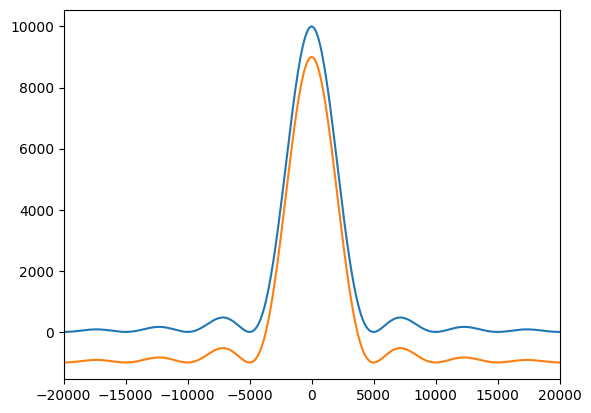

In [23]:
def aperture(xs):
    field = np.zeros_like(xs)
    for i in range(len(xs)):
        if abs(xs[i]) < slit_width / 2:
            field[i] = 1
    return field

plot_limits = [-20000, 20000]
freqs = sp.fft.fftshift(sp.fft.fftfreq(len(xs))) * wavelength * distance / length * steps
plt.plot(freqs, calc_far_field(aperture))
ys = np.linspace(plot_limits[0], plot_limits[1], 1000)
theory = np.sinc(slit_width / wavelength / distance * ys)**2 * 10000 - 1000     # offset to see clearly the simlarity between theory and fft calculation
plt.plot(ys, theory)
plt.xlim(plot_limits[0], plot_limits[1])

Clearly the plots overlap. Task 2 below.

10000


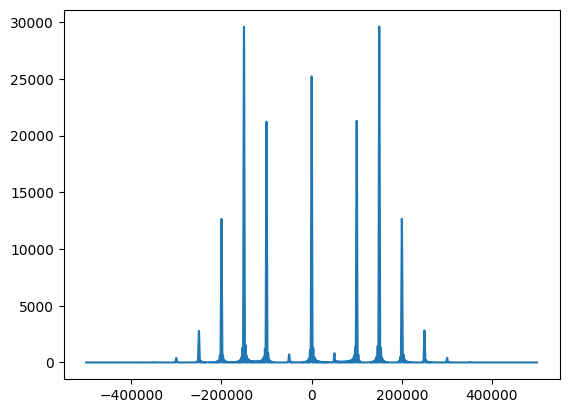

In [24]:
m = 8
s = 100
distance = 10**7

steps = 10000
length = 50000
xs = np.linspace(-length / 2, length / 2, steps)    # slit centered at origin

# define aperture
slit_width = 2000
def aperture(xs):
    print(len(xs))
    field = np.zeros_like(xs, dtype=np.complex128)
    for i in range(len(xs)):
        if abs(xs[i]) < slit_width / 2:
            field[i] = np.exp(1j * m / 2 * np.sin(2 * np.pi * xs[i] / s))
    return field

plot_limits = [-200000, 200000]
# plot_limits = [-1000, 1000]
freqs = sp.fft.fftshift(sp.fft.fftfreq(len(xs))) * wavelength * distance / length * steps
plt.plot(freqs, calc_far_field(aperture))
# plt.plot(xs, np.real(aperture(xs)))
# plt.xlim(plot_limits[0], plot_limits[1])


Increased total extent of aperture to obtain smoother plot.

Task 3. Modify function for near-field.

In [25]:
def calc_near_field(aperture, distance):
    init_field = aperture(xs)
    modified_aperture = init_field * np.exp(1j * np.pi * xs**2 / wavelength / distance)
    ffted = sp.fft.fft(modified_aperture)
    return np.abs(sp.fft.fftshift(ffted))**2

(-200.0, 200.0)

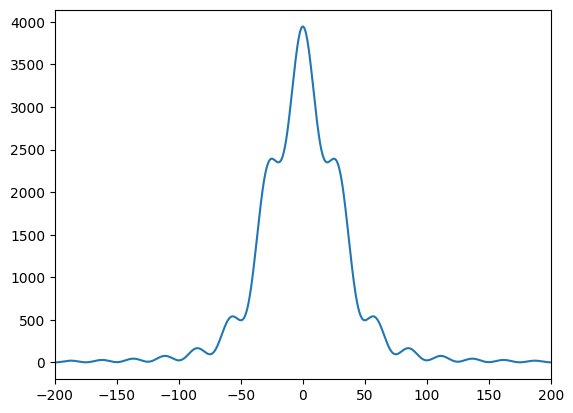

In [44]:
slit_width = 100
distance = 5000
# distance = 10**7

length = 5000

def aperture(xs):
    field = np.zeros_like(xs)
    for i in range(len(xs)):
        if abs(xs[i]) < slit_width / 2:
            field[i] = 1
    return field

steps = 5000
xs = np.linspace(-length / 2, length / 2, steps)    # slit centered at origin

plot_limits = [-200000, 200000]
plot_limits = [-200, 200]

freqs = sp.fft.fftshift(sp.fft.fftfreq(len(xs))) * wavelength * distance / length * steps
plt.plot(freqs, calc_near_field(aperture, distance))
# plt.plot(xs, aperture(xs))

plt.xlim(plot_limits[0], plot_limits[1])

Makes sense, as slit is 100 microns wide, then very close to the slit, the diffraction pattern must have a characteristic half-width of around 50 microns.

10000


(-20000.0, 20000.0)

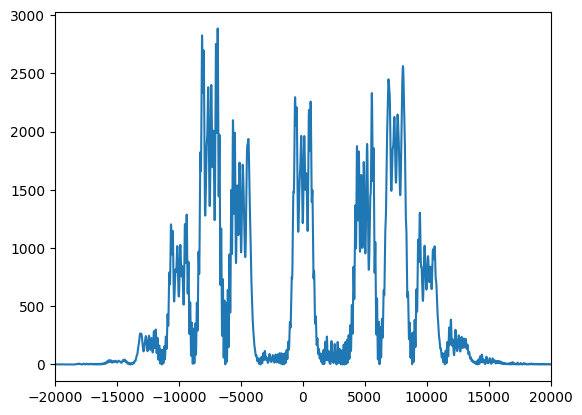

In [45]:
m = 8
s = 100
distance = 0.5 * 10**6
# distance = 10**7


steps = 10000
length = 50000
xs = np.linspace(-length / 2, length / 2, steps)    # slit centered at origin

# define aperture
slit_width = 2000
def aperture(xs):
    print(len(xs))
    field = np.zeros_like(xs, dtype=np.complex128)
    for i in range(len(xs)):
        if abs(xs[i]) < slit_width / 2:
            field[i] = np.exp(1j * m / 2 * np.sin(2 * np.pi * xs[i] / s))
    return field

plot_limits = [-20000, 20000]
freqs = sp.fft.fftshift(sp.fft.fftfreq(len(xs))) * wavelength * distance / length * steps
plt.plot(freqs, calc_near_field(aperture, distance))
plt.xlim(plot_limits[0], plot_limits[1])

plot is more scrunched together, and peaks are much less well defined.

Supp task 1.

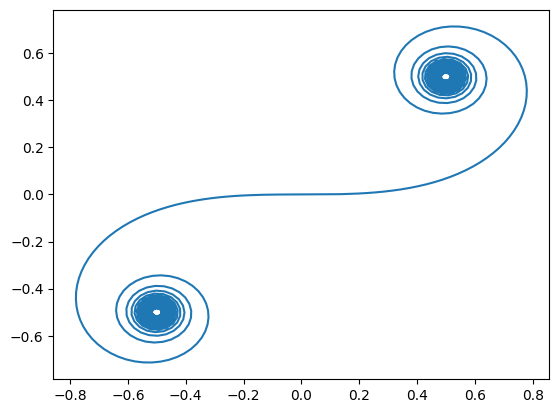

In [9]:
import scipy.integrate as integrate

def cornu_real(u):
    return integrate.quad(lambda x: np.cos(np.pi * x**2 / 2), 0, u)
def cornu_imag(u):
    return integrate.quad(lambda x: np.sin(np.pi * x**2 / 2), 0, u)

us = np.linspace(-15, 15, 1000)
out_real = np.array([cornu_real(u) for u in us])
out_imag = np.array([cornu_imag(u) for u in us])

plt.plot(out_real, out_imag)

Supp task 2. 

(-200.0, 200.0)

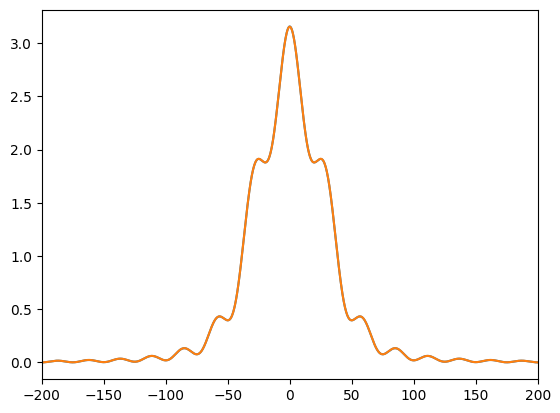

In [17]:
slit_width = 100
distance = 5000
length = 5000
scale = np.sqrt(2 / wavelength / distance)

def calc_intensity(x):
    a = (-slit_width / 2 - x) * scale
    b = (slit_width / 2 - x) * scale
    return (cornu_real(b)[0] - cornu_real(a)[0])**2 + (cornu_imag(b)[0] - cornu_imag(a)[0])**2

xs = np.linspace(-200, 200, 2000)
ints = np.array([calc_intensity(x) for x in xs])
plt.plot(xs, ints)

def aperture(xs):
    field = np.zeros_like(xs)
    for i in range(len(xs)):
        if abs(xs[i]) < slit_width / 2:
            field[i] = 1
    return field

steps = 5000
xs = np.linspace(-length / 2, length / 2, steps)    # slit centered at origin

plot_limits = [-200, 200]
freqs = sp.fft.fftshift(sp.fft.fftfreq(len(xs))) * wavelength * distance / length * steps
plt.plot(freqs, calc_near_field(aperture, distance) / 4000 * 3.2)
plt.xlim(plot_limits[0], plot_limits[1])


Same as before.